In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spam_df = pd.read_csv('emails.csv')

In [3]:
spam_df.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
spam_df.tail(5)

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [5]:
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [6]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [8]:
ham = spam_df[spam_df['spam'] == 0]

In [9]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [10]:
spam = spam_df[spam_df['spam'] == 1]
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [11]:
print('Spam Percentage = ', len(spam)/len(spam_df)*100, '%')
print('Ham Percentage = ', len(ham)/len(spam_df)*100, '%')

Spam Percentage =  23.88268156424581 %
Ham Percentage =  76.11731843575419 %


In [12]:
print(f'Spam Percentage = {len(spam)/len(spam_df)*100:.1f} %')
print(f'Ham Percentage = {len(ham)/len(spam_df)*100:.1f} %')

Spam Percentage = 23.9 %
Ham Percentage = 76.1 %


<AxesSubplot:xlabel='spam', ylabel='count'>

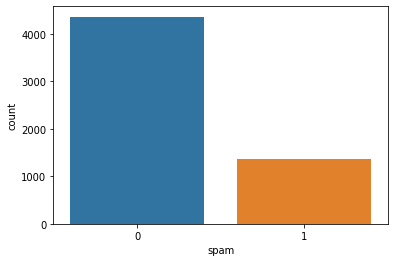

In [13]:
sns.countplot(x = 'spam', data = spam_df)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

sample_data = ['This is the first document.', 'This document is the second document.', 'And this is the third one.', 'Is this the first document?']

sample_vectorizer = CountVectorizer()

In [15]:
X = sample_vectorizer.fit_transform(sample_data)

In [16]:
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [17]:
sample_vectorizer.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [18]:
vectorizer = CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])

In [19]:
# print(vectorizer.get_feature_names())

In [20]:
spamham_countvectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
spamham_countvectorizer.shape

(5728, 37303)

In [22]:
label = spam_df['spam'].values

In [23]:
label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [24]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(spamham_countvectorizer, label)

MultinomialNB()

In [25]:
testing_sample = ['Free and discounted insurance!', 'Hi, when are we going to meet?']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

In [26]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0], dtype=int64)

In [27]:
X = spamham_countvectorizer
y = label

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [29]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

<AxesSubplot:>

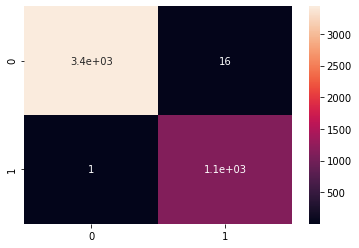

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = NB_classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm_train, annot = True)

<AxesSubplot:>

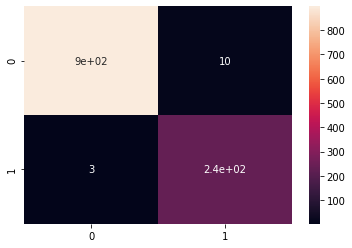

In [31]:
y_predict_test = NB_classifier.predict(X_test)
cm_test = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm_test, annot = True)

In [32]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       908
           1       0.96      0.99      0.97       238

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146

